<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Gender-vs-Heart-Disease" data-toc-modified-id="Gender-vs-Heart-Disease-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gender vs Heart Disease</a></span></li><li><span><a href="#Thal-vs-Heart-Disease" data-toc-modified-id="Thal-vs-Heart-Disease-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Thal vs Heart Disease</a></span></li><li><span><a href="#Age-vs-Heart-Disease" data-toc-modified-id="Age-vs-Heart-Disease-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Age vs Heart Disease</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNeighborsClassifier" data-toc-modified-id="KNeighborsClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>KNeighborsClassifier</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Regular-Decision-Tree" data-toc-modified-id="Regular-Decision-Tree-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Regular Decision Tree</a></span></li><li><span><a href="#Decision-Tree-with-GridSearchCV" data-toc-modified-id="Decision-Tree-with-GridSearchCV-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Decision Tree with GridSearchCV</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Regular-Random-Forest" data-toc-modified-id="Regular-Random-Forest-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Regular Random Forest</a></span></li><li><span><a href="#Random-Forest-with-GridSearchCV" data-toc-modified-id="Random-Forest-with-GridSearchCV-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Random Forest with GridSearchCV</a></span></li><li><span><a href="#Pipeline-with-minmaxscaler-and-randomforestclassifier" data-toc-modified-id="Pipeline-with-minmaxscaler-and-randomforestclassifier-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Pipeline with minmaxscaler and randomforestclassifier</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Regular-XGBoost" data-toc-modified-id="Regular-XGBoost-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Regular XGBoost</a></span></li><li><span><a href="#XGBoost-with-GridSearchCV" data-toc-modified-id="XGBoost-with-GridSearchCV-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>XGBoost with GridSearchCV</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

<font size="6">**Final Project Submission**</font>


Please fill out:
* Student name: Andy Peng
* Student pace: part time
* Scheduled project review date/time: Monday. July 13, 2020
* Instructor name: Eli Thomas
* Blog post URL:


I am tasked to investigate heart diseases for a hospital. For this project we will be looking at a data set of patients in a hospital some with heart diseases and some without heart diseases. The main goal of this project is to keep an eye out for certain features that will allow us to categorize this patient as having heart disease.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    # Your code here
    best_score = 0
    best_k = 0
    
    for i in range(min_k, max_k+1, 2):    
        # Instantiate KNeighborsClassifier
        clf = KNeighborsClassifier(n_neighbors=i)

        # Fit the classifier
        clf.fit(X_train_transformed, y_train)

        # Predict on the test set
        test_preds = clf.predict(X_test_transformed)
        val = f1_score(y_test, test_preds)
        if val > best_score:
            best_score = val
            best_k = i
        else:
            pass
    print('Best Value for k:', best_k)
    print('F1-Score:', best_score)
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [2]:
df = pd.read_csv('datasets_33180_43520_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking for Null Values
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<font size="5">**Column Descriptions**</font>
* age
* sex
  * 1: Male
  * 0: Female
* chest pain type (4 values) (cp)
  * Value 0: asymptomatic

  * Value 1: atypical angina

  * Value 2: non-anginal pain

  * Value 3: typical angina

* resting blood pressure (trestbps)
* serum cholestoral in mg/dl (chol)
* fasting blood sugar > 120 mg/dl (fbs)
  * 0: False
  * 1: True
* resting electrocardiographic results (values 0,1,2) (restecg)
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria

  * Value 1: normal

  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* maximum heart rate achieved (thalach)
* exercise induced angina (exang)
  * 1: Yes
  * 0: No
* oldpeak = ST depression induced by exercise relative to rest 
* the slope of the peak exercise ST segment (slope)

  * 0: downsloping

  * 1: flat

  * 2: upsloping
* number of major vessels (0-3) colored by flourosopy (ca)
* thal: thallium stress result
  * 1: fixed defect; 

  * 2: normal; 

  * 3: reversible defect
* target
  * 0: disease
  
  * 1: No disease
  
For further documentation please refer to this [link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [4]:
df.target = df.target.replace({0:1, 1:0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


The code above is use to swap the target values around so that we can easily interpret the data.

* 0: No Disease

* 1: Disease

In [5]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

We see that ca which represents the number of major vessels colored by flourosopy has values of 4, when the values are suppose to go from 0-3. Therefore we will be dropping these 5 data points.

In [6]:
df = df[df.ca != 4]

In [7]:
df.thal.value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

According to the research of our data set, thal which represents Thalium, a radioactive tracer injected during a stress test. This chemical combined with a camera to take an image of the heart is used to detect the status of your heart. As mentioned above values 1, 2 and 3 are used only. Therefore we will be dropping the 2 values of 0.

In [8]:
df = df[df.thal != 0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
age         296 non-null int64
sex         296 non-null int64
cp          296 non-null int64
trestbps    296 non-null int64
chol        296 non-null int64
fbs         296 non-null int64
restecg     296 non-null int64
thalach     296 non-null int64
exang       296 non-null int64
oldpeak     296 non-null float64
slope       296 non-null int64
ca          296 non-null int64
thal        296 non-null int64
target      296 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


We need to convert the following variables to categorical variables.

* sex
* chest pain type (cp)
* fasting blood sugar > 120 mg/dl (fbs)
* resting electrocardiographic results (restecg)
* exercise induced angina (exang)
* the slope of the peak exercise ST segment (slope)
* number of major vessels (0-3) colored by flourosopy (ca)
* thal
* target

In [10]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for column in cat:
    df[column] = pd.Categorical(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
age         296 non-null int64
sex         296 non-null category
cp          296 non-null category
trestbps    296 non-null int64
chol        296 non-null int64
fbs         296 non-null category
restecg     296 non-null category
thalach     296 non-null int64
exang       296 non-null category
oldpeak     296 non-null float64
slope       296 non-null category
ca          296 non-null category
thal        296 non-null category
target      296 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 17.5 KB


In [11]:
# Now to create dummy variables.
target = df.target
features = df.drop(columns = ['target'], axis = 1)
features = pd.get_dummies(features)
viz_df = pd.concat([features, target], axis = 1)

In [12]:
viz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 29 columns):
age          296 non-null int64
trestbps     296 non-null int64
chol         296 non-null int64
thalach      296 non-null int64
oldpeak      296 non-null float64
sex_0        296 non-null uint8
sex_1        296 non-null uint8
cp_0         296 non-null uint8
cp_1         296 non-null uint8
cp_2         296 non-null uint8
cp_3         296 non-null uint8
fbs_0        296 non-null uint8
fbs_1        296 non-null uint8
restecg_0    296 non-null uint8
restecg_1    296 non-null uint8
restecg_2    296 non-null uint8
exang_0      296 non-null uint8
exang_1      296 non-null uint8
slope_0      296 non-null uint8
slope_1      296 non-null uint8
slope_2      296 non-null uint8
ca_0         296 non-null uint8
ca_1         296 non-null uint8
ca_2         296 non-null uint8
ca_3         296 non-null uint8
thal_1       296 non-null uint8
thal_2       296 non-null uint8
thal_3       296 non-null uin

# Visualizations

## Gender vs Heart Disease

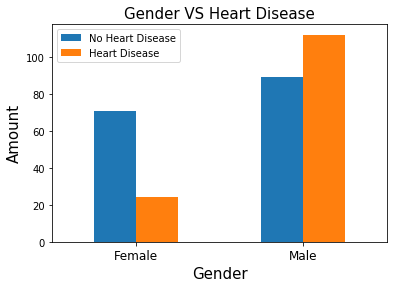

In [13]:
ct = pd.crosstab(df.sex, df.target)
ct.plot.bar()
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Gender VS Heart Disease', fontsize = 15)
#Change the x axis labels from 0 & 1 to female and male
gender_ticks = ['Female', 'Male']
plt.xticks([0, 1], gender_ticks, rotation = 0, fontsize = 12)
#Change the target labels to disease or no disease
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')
plt.show()

We can see above that there are more males than females that have heart disease. Now let's investigate more on what feature stands out more in the individuals with heart disease.

In [14]:
df_disease = df[df['target'] == 1]

In [15]:
# Female
df_disease[df_disease['sex'] == 0].cp.value_counts()

0    21
1     2
2     1
3     0
Name: cp, dtype: int64

In [16]:
# Male
df_disease[df_disease['sex'] == 1].cp.value_counts()

0    81
2    17
3     7
1     7
Name: cp, dtype: int64

The value counts for chest pain in individuals with heart disease is shown above. We can see that the value 0 or Asymptomatic chest pains appear the most in individuals with heart disease. And the graph below we can see that individuals with heart disease tend to have asymptomatic chest pains.

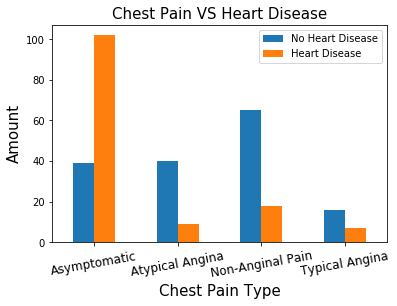

In [17]:
ct = pd.crosstab(df.cp, df.target)
ct.plot.bar()
plt.xlabel('Chest Pain Type', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Chest Pain VS Heart Disease', fontsize = 15)
gender_ticks = ['Asymptomatic', 'Atypical Angina', 'Non-Anginal Pain', 'Typical Angina']
plt.xticks([0, 1, 2, 3], gender_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

## Thal vs Heart Disease

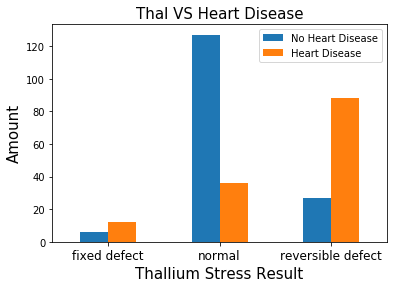

In [18]:
ct = pd.crosstab(df.thal, df.target)
ct.plot.bar()
plt.xlabel('Thallium Stress Result', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Thal VS Heart Disease', fontsize = 15)
gender_ticks = ['fixed defect', 'normal', 'reversible defect']
plt.xticks([0, 1, 2], gender_ticks, rotation = 0, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

The bar graph above shows that individuals with thalium stress result as reversable defect tend to have a higher chance of having heart disease.

## Age vs Heart Disease

Text(0, 0.5, 'Target')

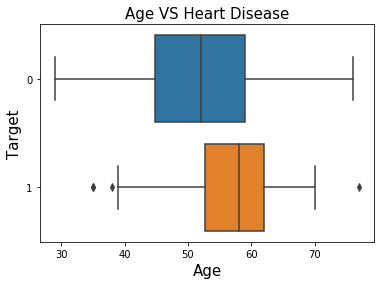

In [19]:
sns.boxplot(x='age',y='target',data=df)
plt.title('Age VS Heart Disease', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Target', fontsize = 15)

We can see in the above graph that people with heart disease tend to be in older people. The lower interquartile range, median and the upper interquartile range tend to be higher than those of no disease. I then thought what comes along with old age, and wanted to investigate the maximum heart rate (thalach).

Text(0, 0.5, 'Target')

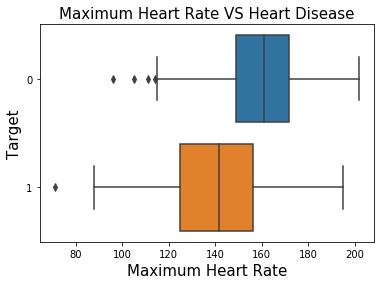

In [20]:
sns.boxplot(x='thalach',y='target',data=df)
plt.title('Maximum Heart Rate VS Heart Disease', fontsize = 15)
plt.xlabel('Maximum Heart Rate', fontsize = 15)
plt.ylabel('Target', fontsize = 15)

We see that people with heart disease do have a lower maximum heart rate.

C:\Users\andyp\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


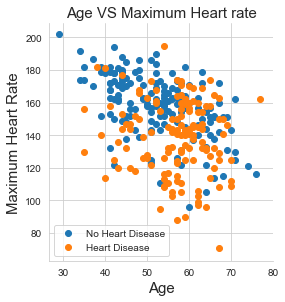

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="target", size=4) \
   .map(plt.scatter, "age", "thalach")
plt.title('Age VS Maximum Heart rate', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Maximum Heart Rate', fontsize = 15)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')
plt.show()

Now let's look at a scatter plot of age versus the maximum heart rate grouped by people with heart disease. As you can see above as you get older, your maximum heart rate decreases. Notice that majority of the people with heart disease tend to have a lower maximum heart rate and are older.

# Modeling

In [22]:
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12)

In [23]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

We want lower amount of False Negatives because we don't want to say that they don't have heart disease when they do have heart disease.

## Logistic Regression

In [24]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)

# Predict
y_hat_test = logreg.predict(X_test)

In [25]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_hat_test))

print(classification_report(y_test, y_hat_test))

[[27  4]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [26]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.9176863181312569


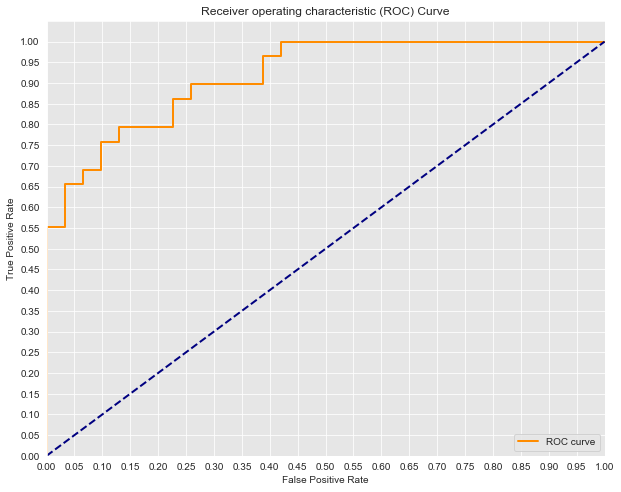

In [27]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## KNeighborsClassifier 

In [28]:
find_best_k(X_train_transformed, y_train, X_test_transformed, y_test)

Best Value for k: 3
F1-Score: 0.8421052631578947


In [29]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier
clf.fit(X_train_transformed, y_train)

# Predict on the test set
test_preds = clf.predict(X_test_transformed)

In [30]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, test_preds))

print(classification_report(y_test, test_preds))

[[27  4]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.83      0.84        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.85


In [32]:
# Use predict_proba to get probability estimates of KNN
y_scoreknn = clf.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scoreknn[:, 1])

AUC: 0.6763070077864294


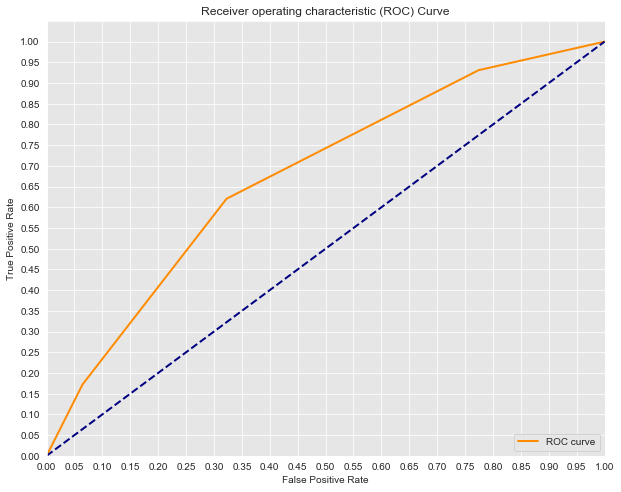

In [33]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

### Regular Decision Tree

In [34]:
dclf = DecisionTreeClassifier(random_state=10)
dclf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [35]:
y_pred = dclf.predict(X_test)

In [36]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Confusion matrix and classification report
print('\n', confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


AUC is :0.75

 [[24  7]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        31
           1       0.75      0.72      0.74        29

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



### Decision Tree with GridSearchCV

In [37]:
dclf_param_grid = {
     'criterion':['gini', 'entropy'],
     'max_depth':[None, 2,3,4,5,6],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,3,4,5,6]
}

In [38]:
# Instantiate GridSearchCV
dclf_grid_search = GridSearchCV(dclf, dclf_param_grid, cv = 5, return_train_score = True)

# Fit to the data
dclf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [39]:
# Mean training score
dt_gs_training_score = np.mean(dclf_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dclf_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dclf_grid_search.best_params_

Mean Training Score: 87.60%
Mean Test Score: 78.33%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [40]:
dclfBest = DecisionTreeClassifier(random_state=10, criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)
dclfBest.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [41]:
# Test set predictions
predclfBest = dclfBest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predclfBest))

print(classification_report(y_test, predclfBest))

[[25  6]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        31
           1       0.79      0.76      0.77        29

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



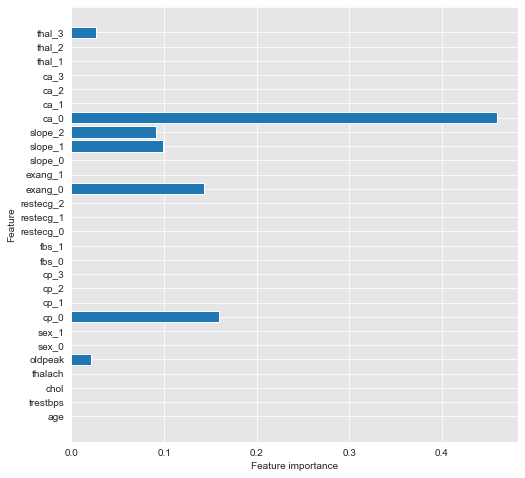

In [42]:
plot_feature_importances(dclfBest)

In [43]:
y_scoredt = dclfBest.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scoredt[:, 1])

AUC: 0.8804226918798665


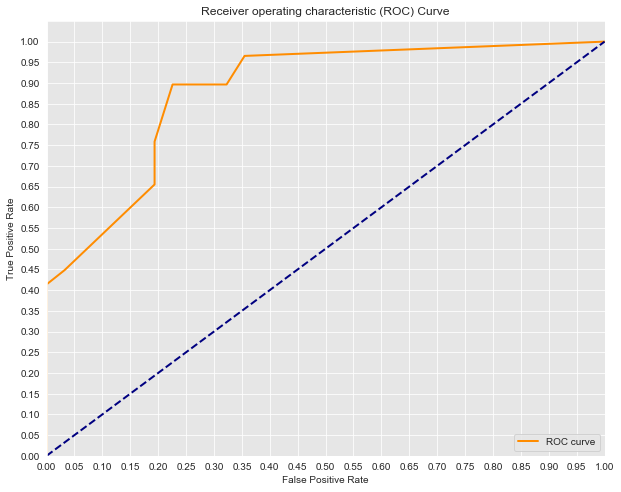

In [44]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest 

### Regular Random Forest

In [45]:
forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [46]:
# Test set predictions
predF = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predF))

print(classification_report(y_test, predF))

[[27  4]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.85      0.76      0.80        29

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



### Random Forest with GridSearchCV 

In [47]:
dt_param_grid = {
     'criterion':['gini', 'entropy'],
     'max_depth':[None, 2,3,4,5,6],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,3,4,5,6]
}

In [48]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(forest, dt_param_grid, cv = 5, return_train_score = True, scoring = 'accuracy')

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [49]:
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [50]:
forestBest = RandomForestClassifier(n_estimators = 100, max_depth = 2, criterion = 'gini', min_samples_leaf = 3, min_samples_split = 10)
forestBest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=10)

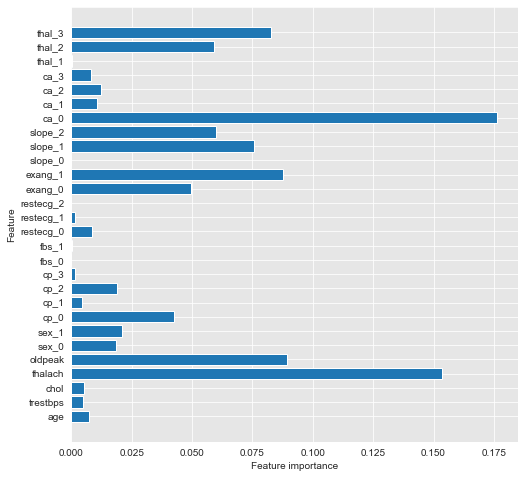

In [51]:
plot_feature_importances(forestBest)

In [52]:
# Test set predictions
predFBest = forestBest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predFBest))

print(classification_report(y_test, predFBest))

[[28  3]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        31
           1       0.87      0.69      0.77        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [53]:
y_scoreforest = forestBest.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scoreforest[:, 1])

AUC: 0.9432703003337042


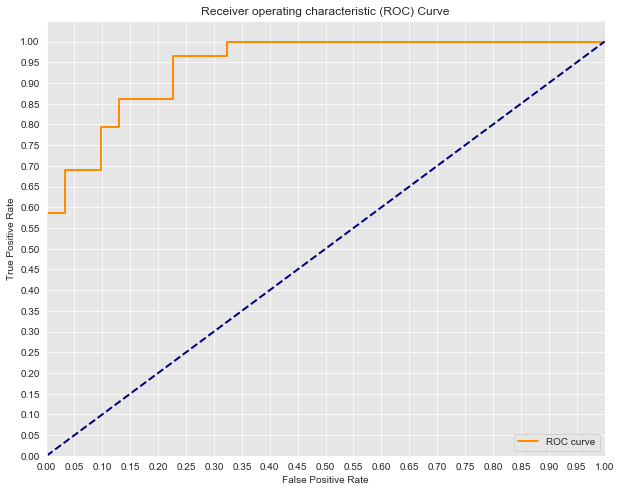

In [54]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

All the values went higher after finding using the best parameter combination found through gridsearchcv. 

### Pipeline with minmaxscaler and randomforestclassifier

In [55]:
# Build a pipeline with MinMaxScaler and RandomForestClassifier (Using standard scaler didn't make sense with categorical)
scaled_pipeline_2 = Pipeline([('mm', MinMaxScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

In [56]:
# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [57]:
# Define a grid search
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [58]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.85

In [59]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

## XGBoost

### Regular XGBoost

In [60]:
xgbclf = XGBClassifier()
xgbclf.fit(X_train, y_train)
training_preds = xgbclf.predict(X_train)
val_preds = xgbclf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [61]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, val_preds))

print(classification_report(y_test, val_preds))

[[27  4]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.86      0.86      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



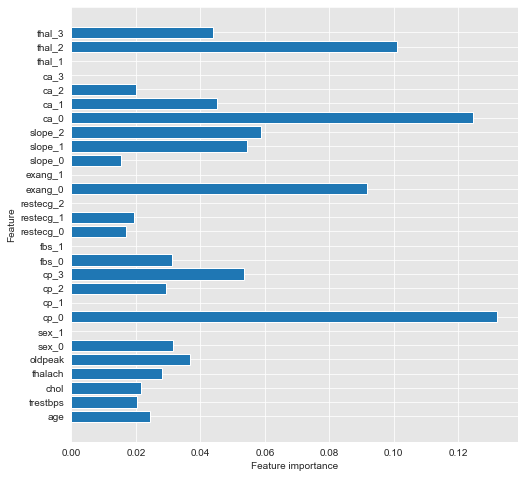

In [62]:
plot_feature_importances(xgbclf)

In [63]:
# Use predict_proba to get probability estimates of KNN
y_scorexgb = xgbclf.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scorexgb[:, 1])

AUC: 0.9232480533926585


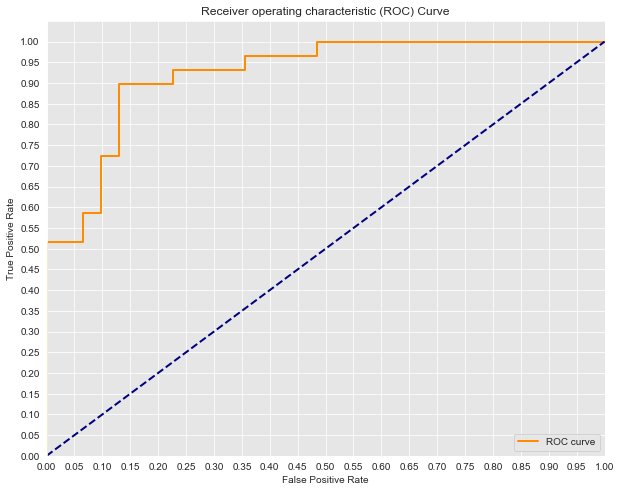

In [64]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost with GridSearchCV

In [65]:
xgbparam_grid = {
    "learning_rate": [0.01, 0.1],
    'max_depth': [2,3,4,5, 6],
    'min_child_weight': [2, 5, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [5, 10, 30, 100, 250],
}

In [66]:
grid_clf = GridSearchCV(xgbclf, xgbparam_grid, scoring = 'accuracy', cv = 3, n_jobs = 1)
grid_clf.fit(features, target)
# grid_clf.fit(None, None)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_predsbest = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracybest = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracybest * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 2
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Training Accuracy: 91.53%
Validation accuracy: 86.67%


In [67]:
print(confusion_matrix(y_test, val_predsbest))

print(classification_report(y_test, val_predsbest))

[[30  1]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.96      0.83      0.89        29

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



In [68]:
xgbclfBest = XGBClassifier(learning_rate = 0.1, max_depth = 2, min_child_weight = 2, n_estimators = 100, subsample = 0.5)
xgbclfBest.fit(X_train, y_train)
val_predsBest = xgbclfBest.predict(X_test)

In [69]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, val_predsBest))

print(classification_report(y_test, val_predsBest))

[[28  3]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.89      0.83      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [70]:
y_scorexgb = xgbclfBest.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scorexgb[:, 1])

AUC: 0.935483870967742


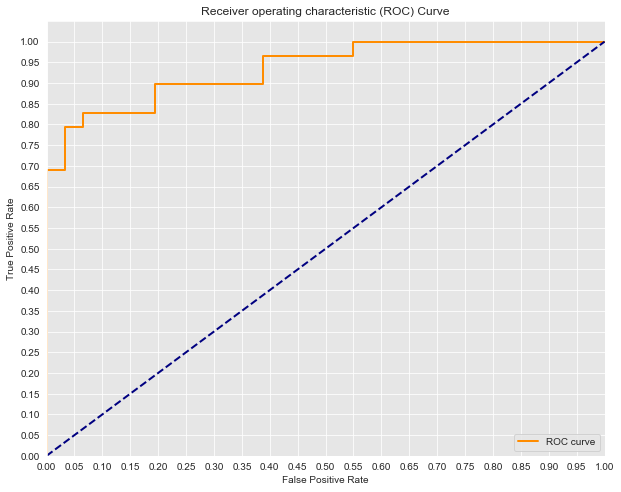

In [71]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion

To summarize everything above, we can see from above that to correctly classified a patient as having heart disease we need to consider the following features.

1) Gender of the individual - Males have a higher chance at having heart disease than females.

2) Asymptomatic Chest Pain - Individuals with this type of chest pain have a high chance of having heart disease

3) Reversible Defect - If the thalium stress result turns out to be reversable defect, the individual would have a high chance of having heart disease.

4) Age & Maximum Heart Rate - As you get older, your maximum heart rate goes down. We can see that individuals that have heart disease tend to be older and have a lower maximum heart rate. 

Our modeling shows that a regular XGBoost is the best model for our problem. This is because we want a model that generates a high recall value in order to minimize the chance of us classifying an individual as false negatives. We are classifying individuals with heart disease, if we classify someone with no heart disease and they do have it would be really bad. For other modelings that we did, please review the codes above.

Best Model for the following things:

* AUC - Random Forest with GridSearchCV

* Accuracy/Precision/F1 Score - XGBoost with GridSearchCV

* Recall - XGBoost